<a href="https://www.kaggle.com/code/himanshunakrani/bitcoin-price-prediction-updated-13-november?scriptVersionId=111442784" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
!pip install yfinance

In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# data preperation

In [4]:
# data = pd.read_csv('../input/cryptocurrencies-dataset/crypto_data_updated_13_november.csv')

In [5]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [6]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [7]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-11-19 00:00:00+00:00,8036.490234,3149319936,354.385986,1181529984,1.002440,485752992,1.61377,38081700
2017-11-20 00:00:00+00:00,8200.639648,3488450048,366.730011,807027008,1.001920,449595008,1.62445,12994500
2017-11-21 00:00:00+00:00,8071.259766,4277609984,360.401001,949912000,0.996047,622649024,1.57406,5440790
2017-11-22 00:00:00+00:00,8253.549805,3633530112,380.652008,800819008,1.000150,499812000,1.61175,7177000
2017-11-23 00:00:00+00:00,8038.770020,4225179904,410.165985,1845680000,0.994631,735883008,1.54870,8392640


In [8]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2022-11-15 00:00:00+00:00,16884.613281,36599436183,1251.736206,11798011594,0.999130,47859299075,276.874023,1116291060
2022-11-16 00:00:00+00:00,16669.439453,33925512989,1215.602539,11939561598,0.999229,45661177296,272.081604,908816092
2022-11-17 00:00:00+00:00,16687.517578,27868914022,1200.808594,9723646871,0.999402,37744442250,267.911316,854777255
2022-11-18 00:00:00+00:00,16697.777344,26862218609,1212.300293,7979913378,0.999163,34879098921,273.919983,685307608
2022-11-19 00:00:00+00:00,16612.847656,22799634432,1207.617310,6934138880,0.999179,30807070720,270.611359,661427264


In [9]:
# data = data.drop(columns = ['Unnamed: 0'])

In [10]:
# data.head()

In [11]:
# data.to_csv('crypto prices.csv')

In [12]:
data.shape

(1827, 8)

In [13]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [14]:
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-11-19 00:00:00+00:00,8036.490234,3149319936,354.385986,1181529984,1.002440,485752992,1.613770,38081700
2017-11-20 00:00:00+00:00,8200.639648,3488450048,366.730011,807027008,1.001920,449595008,1.624450,12994500
2017-11-21 00:00:00+00:00,8071.259766,4277609984,360.401001,949912000,0.996047,622649024,1.574060,5440790
2017-11-22 00:00:00+00:00,8253.549805,3633530112,380.652008,800819008,1.000150,499812000,1.611750,7177000
2017-11-23 00:00:00+00:00,8038.770020,4225179904,410.165985,1845680000,0.994631,735883008,1.548700,8392640
...,...,...,...,...,...,...,...,...
2022-11-14 00:00:00+00:00,16618.199219,49630243054,1241.604248,15028035663,0.999013,65634612428,278.578430,1541330420
2022-11-15 00:00:00+00:00,16884.613281,36599436183,1251.736206,11798011594,0.999130,47859299075,276.874023,1116291060
2022-11-16 00:00:00+00:00,16669.439453,33925512989,1215.602539,11939561598,0.999229,45661177296,272.081604,908816092


# Exploratory Data Analysis

### Statistical Analysis

In [15]:
#check the shape of the dataframe
data.shape 

(1826, 8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2017-11-19 00:00:00+00:00 to 2022-11-18 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1826 non-null   float64
 1   Volume (BTC)   1826 non-null   int64  
 2   Close (ETH)    1826 non-null   float64
 3   Volume (ETH)   1826 non-null   int64  
 4   Close (USDT)   1826 non-null   float64
 5   Volume (USDT)  1826 non-null   int64  
 6   Close (BNB)    1826 non-null   float64
 7   Volume (BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [17]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [18]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03
mean,20261.013885,2.639918e+10,1132.102765,1.312480e+10,1.001591,4.171007e+10,144.708285,9.750858e+08
std,17017.976081,1.993096e+10,1203.470985,1.084987e+10,0.005770,3.837296e+10,184.159753,1.452399e+09
min,3236.761719,2.923670e+09,84.308296,8.008190e+08,0.966644,4.495950e+08,1.548700,9.284000e+03
25%,7682.069092,1.144772e+10,208.920326,4.539514e+09,0.999981,6.662638e+09,14.166100,1.383643e+08
50%,10850.005859,2.413927e+10,479.428528,1.099452e+10,1.000499,3.689169e+10,24.251195,3.575134e+08
75%,33740.259766,3.578419e+10,1803.337372,1.836379e+10,1.002498,6.100956e+10,293.945900,1.423453e+09
max,67566.828125,3.509679e+11,4812.087402,8.448291e+10,1.077880,2.790675e+11,675.684082,1.798295e+10


### Visualization Analysis

<AxesSubplot:xlabel='Date'>

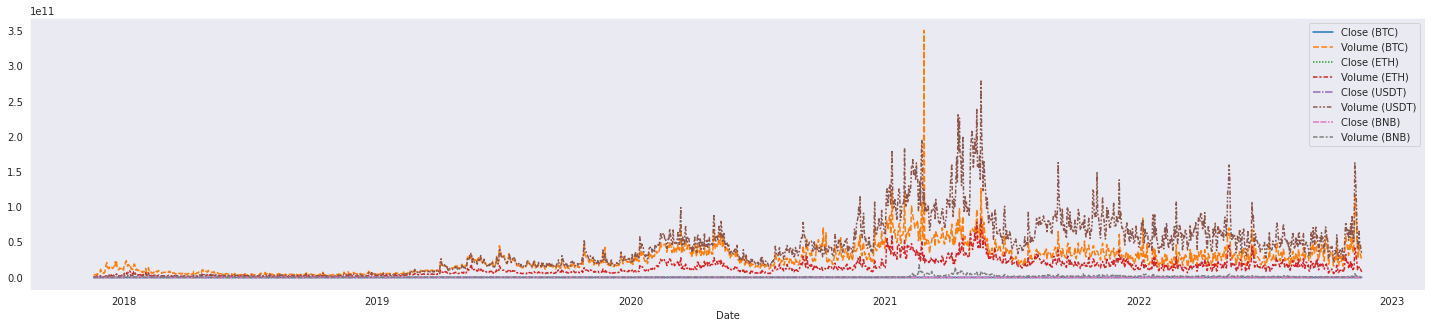

In [19]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

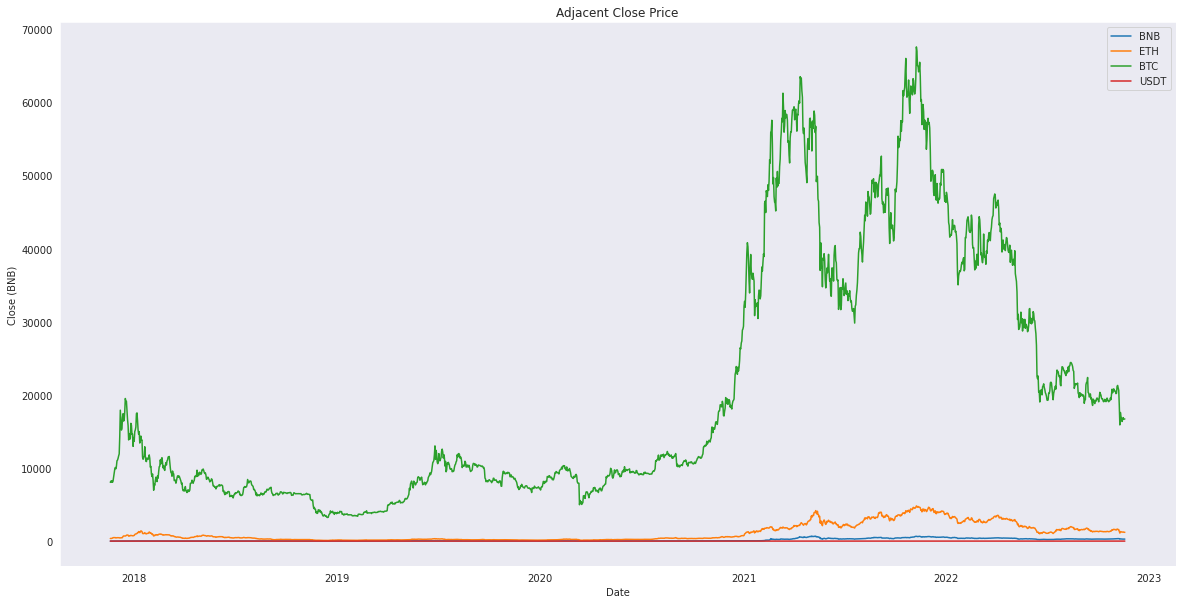

In [20]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

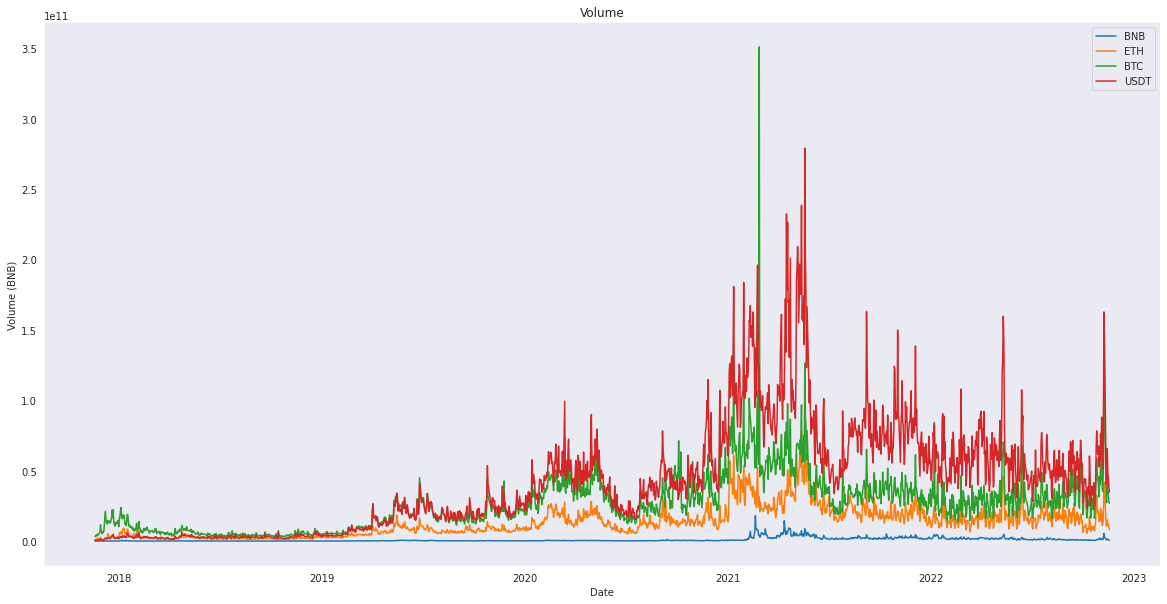

In [21]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

In [22]:
data_btc = data.loc[:,'Close (BTC)'].values
data_btc

array([ 8036.49023438,  8200.63964844,  8071.25976562, ...,
       16669.43945312, 16687.51757812, 16697.77734375])

In [23]:
import plotly.graph_objects as go
from datetime import datetime

temp = yf.Ticker('BTC-USD')
data_btc = btc.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_btc.index,
                open=data_btc['Open'],
                high=data_btc['High'],
                low=data_btc['Low'],
                close=data_btc['Close'])])

fig.show()

array([[<AxesSubplot:title={'center':'Close (BTC)'}>,
        <AxesSubplot:title={'center':'Volume (BTC)'}>,
        <AxesSubplot:title={'center':'Close (ETH)'}>,
        <AxesSubplot:title={'center':'Volume (ETH)'}>],
       [<AxesSubplot:title={'center':'Close (USDT)'}>,
        <AxesSubplot:title={'center':'Volume (USDT)'}>,
        <AxesSubplot:title={'center':'Close (BNB)'}>,
        <AxesSubplot:title={'center':'Volume (BNB)'}>]], dtype=object)

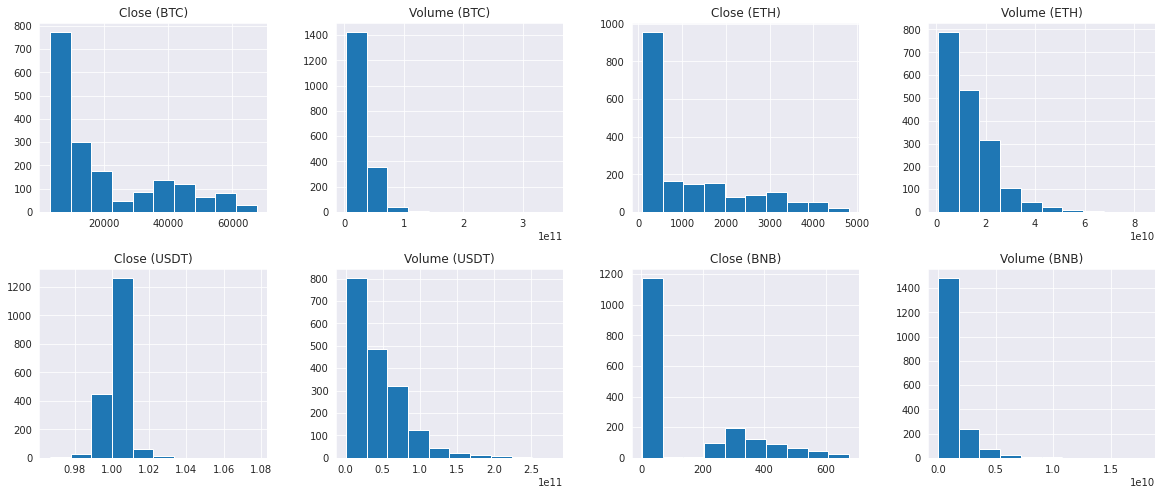

In [24]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

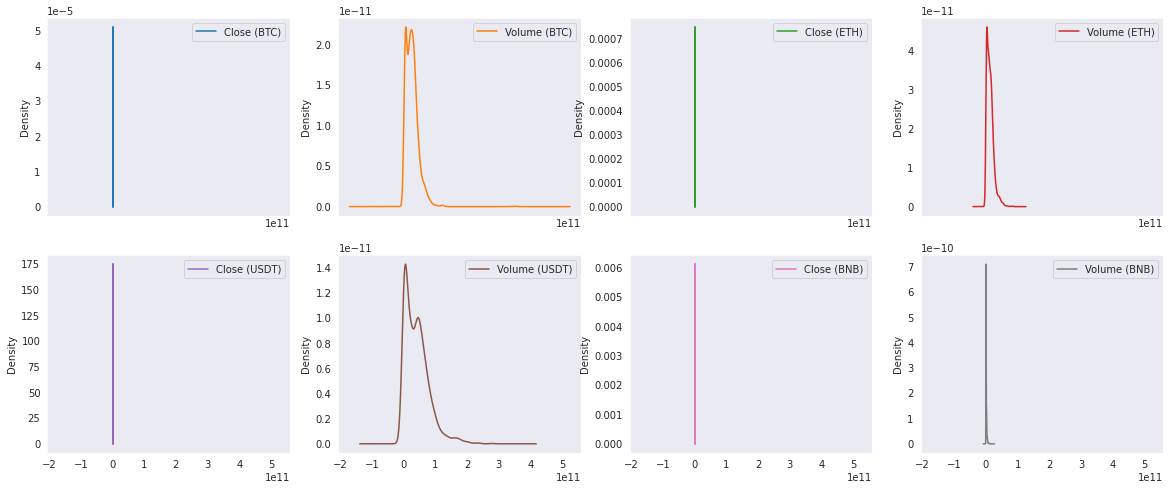

In [25]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

### checking for correlation

In [26]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.555587,0.924061,0.663016,-0.147986,0.763655,0.899913,0.763344
Volume (BTC),0.555587,1.000000,0.378430,0.856032,-0.098908,0.867427,0.410755,0.597817
Close (ETH),0.924061,0.378430,1.000000,0.541384,-0.151415,0.624398,0.955068,0.649432
Volume (ETH),0.663016,0.856032,0.541384,1.000000,-0.118624,0.946501,0.563329,0.697511
Close (USDT),-0.147986,-0.098908,-0.151415,-0.118624,1.000000,-0.139749,-0.162434,-0.115537
Volume (USDT),0.763655,0.867427,0.624398,0.946501,-0.139749,1.000000,0.652265,0.772946
Close (BNB),0.899913,0.410755,0.955068,0.563329,-0.162434,0.652265,1.000000,0.717699
Volume (BNB),0.763344,0.597817,0.649432,0.697511,-0.115537,0.772946,0.717699,1.000000


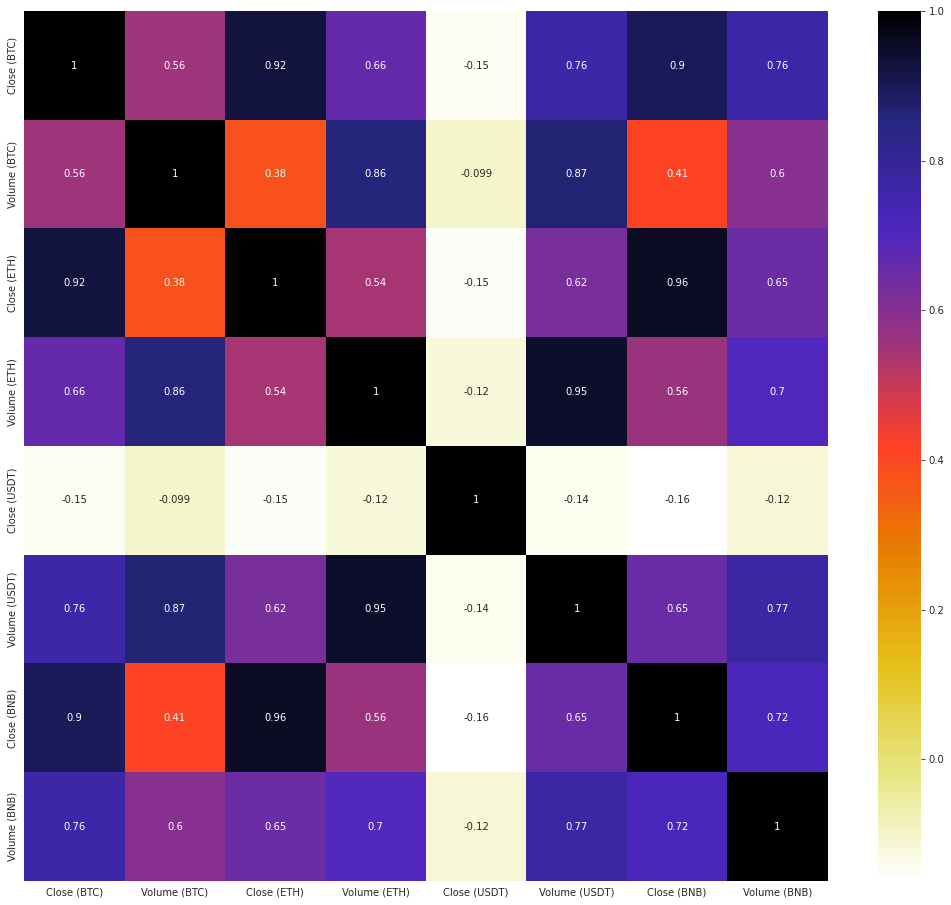

In [27]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

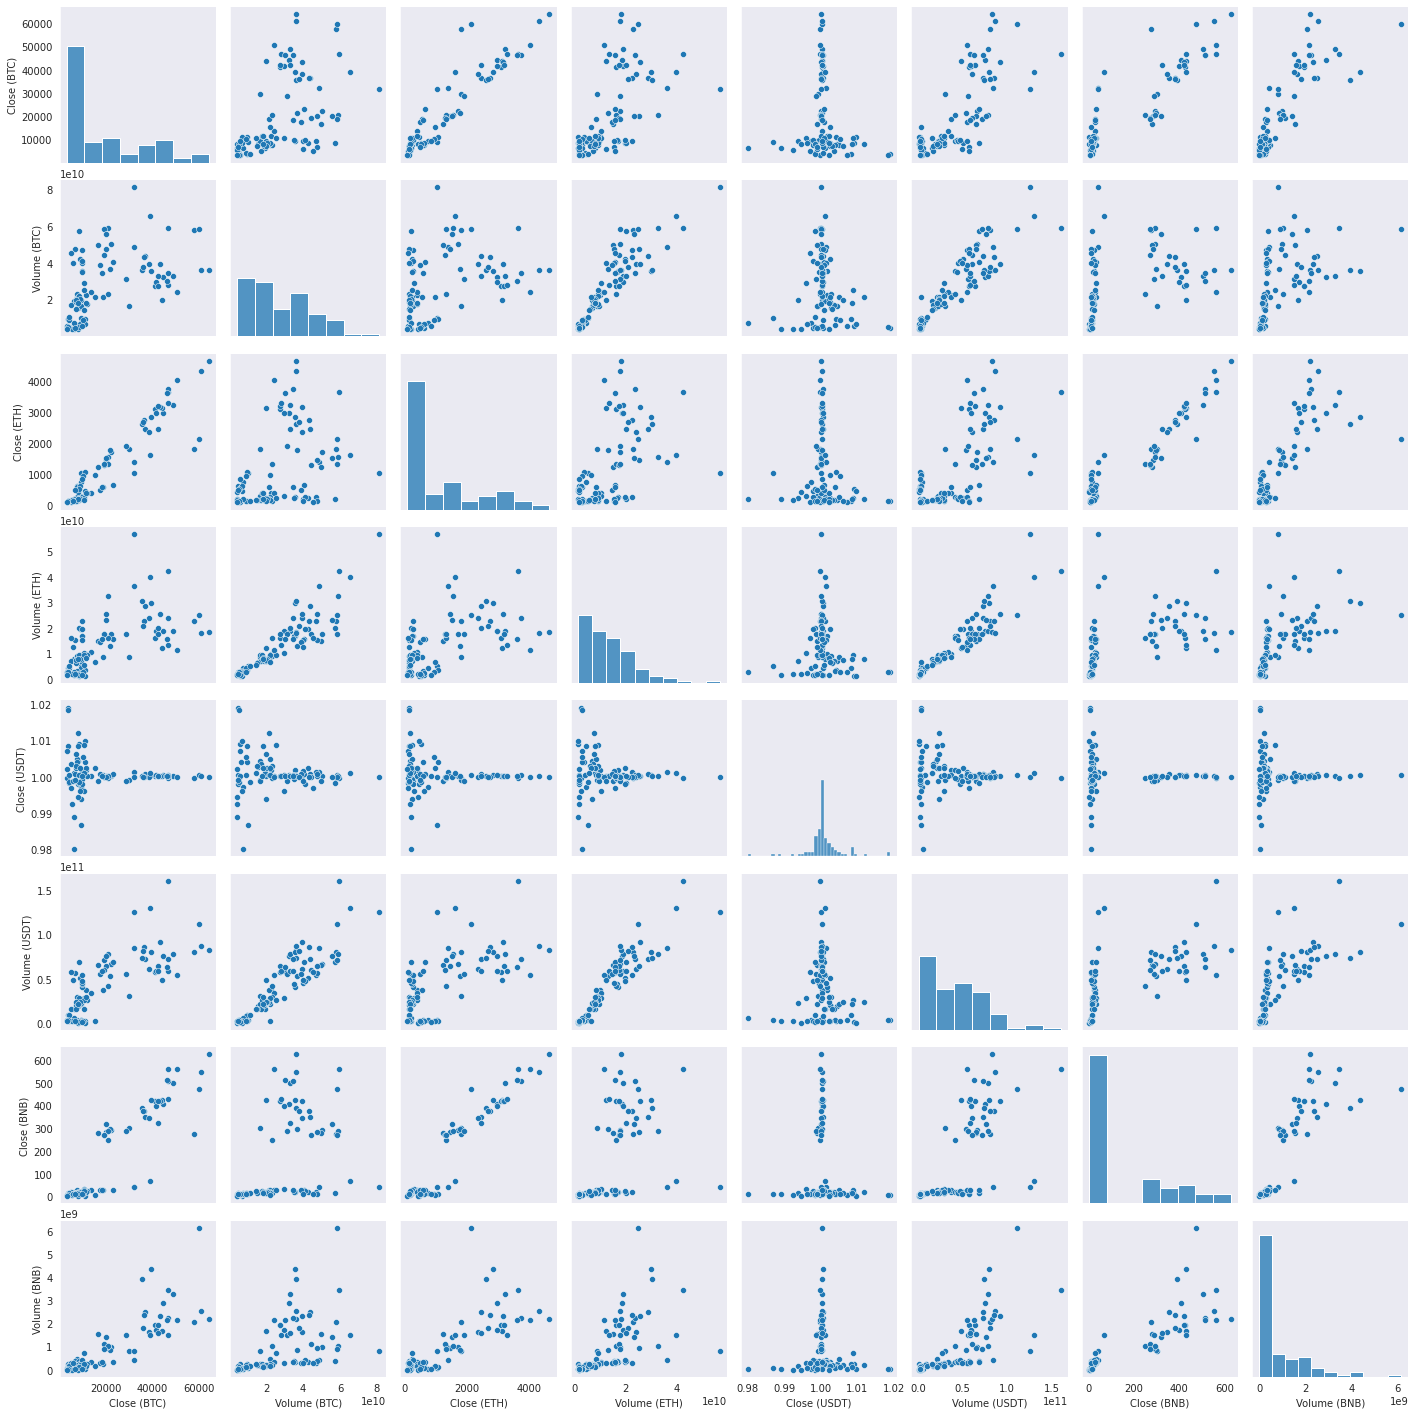

In [28]:
sns.pairplot(data.sample(n=100));

In [29]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)

# data Pre-processing

In [30]:
# X = data.loc[:, ['Adj Close (BNB)', 'Adj Close (USDT)', 'Adj Close (ETH)']]
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [31]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2017-11-19 00:00:00+00:00,3149319936,354.385986,1181529984,1.002440,485752992,1.61377,38081700
2017-11-20 00:00:00+00:00,3488450048,366.730011,807027008,1.001920,449595008,1.62445,12994500
2017-11-21 00:00:00+00:00,4277609984,360.401001,949912000,0.996047,622649024,1.57406,5440790
2017-11-22 00:00:00+00:00,3633530112,380.652008,800819008,1.000150,499812000,1.61175,7177000
2017-11-23 00:00:00+00:00,4225179904,410.165985,1845680000,0.994631,735883008,1.54870,8392640


In [32]:
Y.head()

Date
2017-11-19 00:00:00+00:00    8036.490234
2017-11-20 00:00:00+00:00    8200.639648
2017-11-21 00:00:00+00:00    8071.259766
2017-11-22 00:00:00+00:00    8253.549805
2017-11-23 00:00:00+00:00    8038.770020
Name: Close (BTC), dtype: float64

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [34]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Selection

In [36]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# BaseLine Modeling




In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [39]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [40]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [41]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

# Evaluation

In [42]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [43]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.9218556594765153
------------------------------
------------------------------
random forest:  0.9532556291121563
------------------------------
------------------------------
decision tree:  0.8850645436492809
------------------------------
------------------------------
gradient boosting:  0.9452726143461715
------------------------------


result: random forest gives the highest accuracy.

In [44]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_test.index, y = Y_pred, label = "Predicted Price")
# sns.lineplot(x = X_test.index, y = Y_test, label = "Actual Price")
# plt.title('Actual vs Predicted values in test data')

In [45]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_train.index, y = rf.predict(X_train), label = "Predicted Price")
# sns.lineplot(x = X_train.index, y = Y_train, label = "Actual Price")
# plt.title('Actual vs Predicted values in training data')

# Hyperparameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 1

In [48]:
rf_random.best_params_

{'n_estimators': 230,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 140,
 'bootstrap': True}

# Model Evaluation (performance analysis)

In [49]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.9537917818753
------------------------------


# Machine Learning Explainability

In [50]:
import shap

In [51]:
shap.initjs()

In [52]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

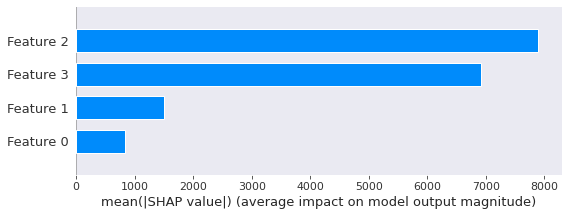

In [53]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

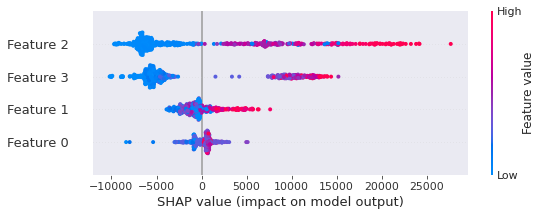

In [54]:
shap.summary_plot(shap_values, X_test)

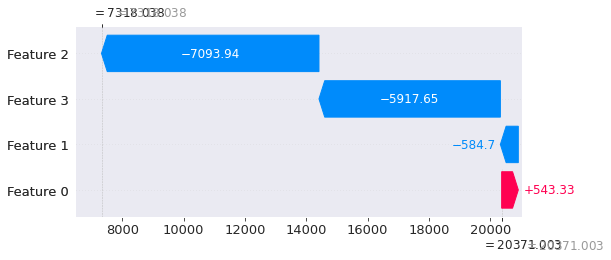

[0.32261119 0.00487233 0.01608116 0.00657185]


In [55]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf).expected_value[0], 
                                       shap_values[row],
                                      )

print(X_test[111])

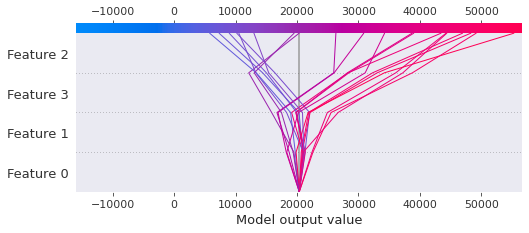

In [56]:
shap.decision_plot(shap.TreeExplainer(rf).expected_value[0], 
                   shap_values[110:130])

In [57]:
shap.force_plot(shap.TreeExplainer(rf).expected_value, shap_values[0:257], X_test[0:257])

# Prediction

In [58]:
original

Close (BTC)      1.661285e+04
Volume (BTC)     2.279963e+10
Close (ETH)      1.207617e+03
Volume (ETH)     6.934139e+09
Close (USDT)     9.991795e-01
Volume (USDT)    3.080707e+10
Close (BNB)      2.706114e+02
Volume (BNB)     6.614273e+08
Name: 2022-11-19 00:00:00+00:00, dtype: float64

---